<a href="https://colab.research.google.com/github/ajraymond27/DeepLearningVids/blob/AJ/neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Configure

In [2]:
import tensorflow as tf

In [3]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [6]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

TEST
Upload local files 

In [22]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
print(uploaded)

Saving Shuckstack Fire Tower_000.jpg to Shuckstack Fire Tower_000 (3).jpg
Saving Shuckstack Fire Tower_025.jpg to Shuckstack Fire Tower_025 (3).jpg
Saving Shuckstack Fire Tower_050.jpg to Shuckstack Fire Tower_050 (3).jpg
Saving Shuckstack Fire Tower_075.jpg to Shuckstack Fire Tower_075 (3).jpg
Saving Shuckstack Fire Tower_100.jpg to Shuckstack Fire Tower_100 (2).jpg
Saving Shuckstack Fire Tower_125.jpg to Shuckstack Fire Tower_125 (2).jpg
Saving Shuckstack Fire Tower_150.jpg to Shuckstack Fire Tower_150 (2).jpg
Saving Shuckstack Fire Tower_175.jpg to Shuckstack Fire Tower_175 (2).jpg
Saving Shuckstack Fire Tower_200.jpg to Shuckstack Fire Tower_200 (2).jpg
Saving Shuckstack Fire Tower_225.jpg to Shuckstack Fire Tower_225 (2).jpg
Saving Shuckstack Fire Tower_250.jpg to Shuckstack Fire Tower_250 (2).jpg
Saving Shuckstack Fire Tower_275.jpg to Shuckstack Fire Tower_275 (2).jpg
Saving Shuckstack Fire Tower_299.jpg to Shuckstack Fire Tower_299 (2).jpg


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Upload 2 images and choose a style image and a content image:

In [21]:
# content_path = tf.keras.utils.get_file('001.png' , 'https://static.toiimg.com/photo/msid-64559696,width-96,height-65.cms')
content_path = uploaded[0]
style_path = tf.keras.utils.get_file('face.jpg','https://images-na.ssl-images-amazon.com/images/I/516jNbZlvkL._AC_.jpg')

KeyError: ignored

# Visualize Input

Define a function to load an image and limit its maximum dimension to 512 pixels.

In [9]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

Create a simple function to display an image:

In [12]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

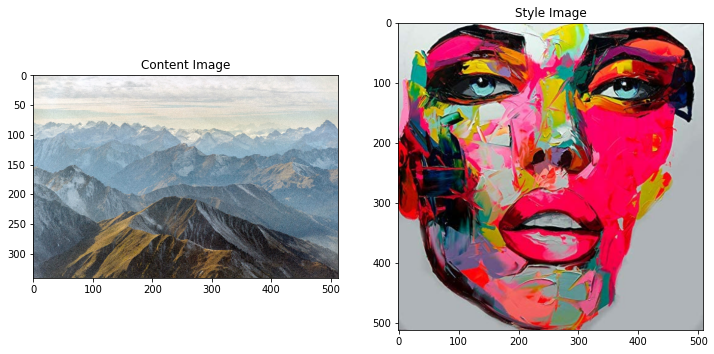

In [13]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

# Fast Style Transfer Using TF-Hub

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let's see how the TensorFlow Hub model does this:

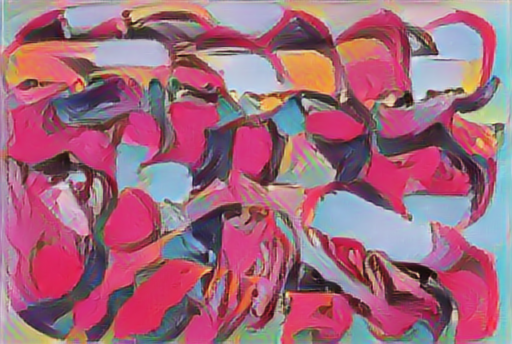

In [14]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)